# Project 1 for LING413 
##### Graph Creation

Imports:

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import re

Get data from files:

In [28]:
files = ["unigram_tripadvisor.csv", "bigram_tripadvisor.csv", "trigram_tripadvisor.csv"]
country_counts = [{}, {}, {}]

for i, file in enumerate(files):
    df = pd.read_csv(file, sep = ",")
    for j in df["country"]:
        country_counts[i][j] = 1 + country_counts[i].get(j, 0)
    del df

Creating Graphs:

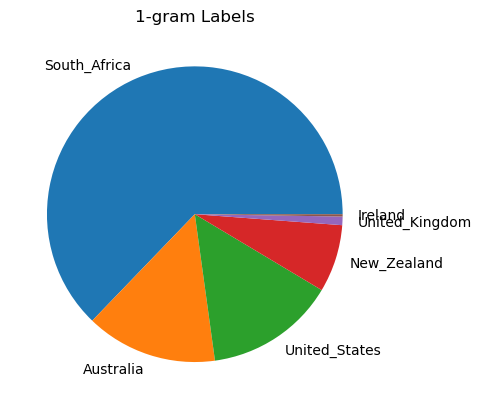

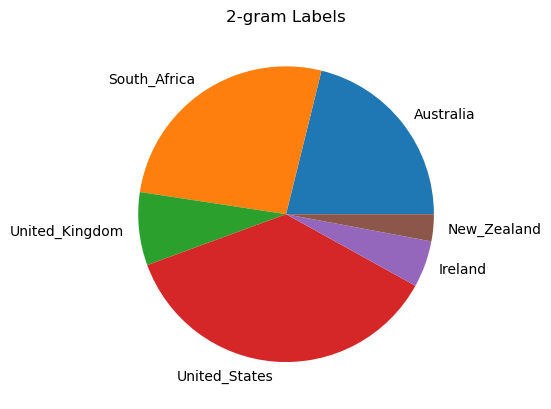

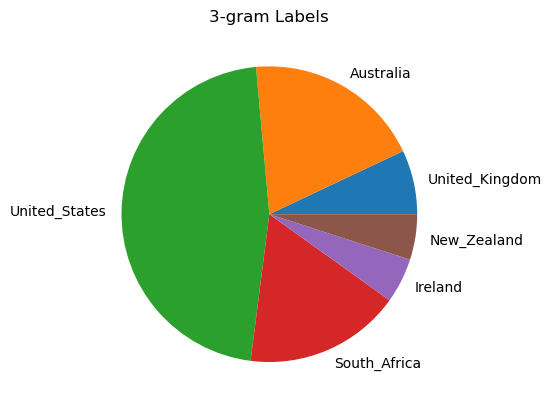

In [29]:

for ngram, count in enumerate(country_counts):
    # fig, ax = plt.subplots()
    plt.pie(count.values(), labels=count.keys())
    plt.title(str(ngram + 1) + '-gram Labels')
    plt.show()

Open Files and Extract Data for Accuracy Graph:

In [32]:
files = ["unigram_tweet_classification_results.txt", "bigram_tweet_classification_results.txt", "trigram_tweet_classification_results.txt"]
content = []

for i, file in enumerate(files):
    with open(file, "r") as f:
        lines = [line.strip() for line in f if line.strip()]

        country_f_scores = {}
        for line in lines[2:]:
            match = re.search(r"(\S+)\s+([\d.]+)", line)
            if match:
                country_f_scores[match.group(1)] = float(match.group(2))

        content.append(country_f_scores)

print(content)

[{'Ireland': 0.91, 'New_Zealand': 0.86, 'South_Africa': 0.95, 'United_Kingdom': 0.88, 'United_States': 0.92, 'accuracy': 0.9, 'avg': 0.9}, {'Ireland': 0.74, 'New_Zealand': 0.66, 'South_Africa': 0.82, 'United_Kingdom': 0.68, 'United_States': 0.75, 'accuracy': 0.72, 'avg': 0.72}, {'Ireland': 0.53, 'New_Zealand': 0.47, 'South_Africa': 0.65, 'United_Kingdom': 0.47, 'United_States': 0.51, 'accuracy': 0.52, 'avg': 0.52}]


Create Graphs for Model Accuracy

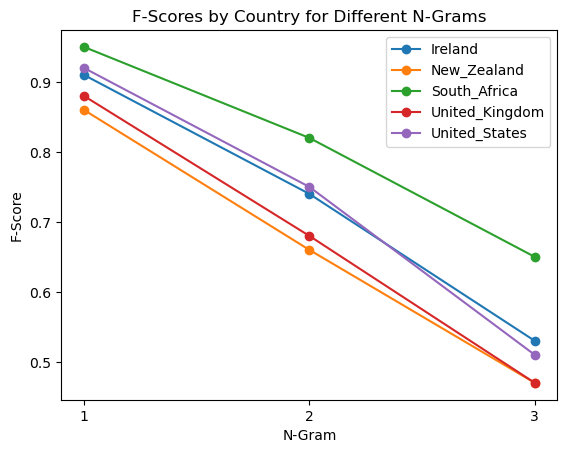

In [41]:
countries = list(content[0].keys())[:-2]  # Exclude 'accuracy' and 'avg'
values = [[item[country] for item in content] for country in countries]

for i, country in enumerate(countries):
    plt.plot([0, 1, 2], values[i], label=country, marker = 'o')

plt.xlabel("N-Gram")
plt.ylabel("F-Score")
plt.title("F-Scores by Country for Different N-Grams")
plt.xticks([])
plt.xticks(range(len(values[0])), range(1, len(values[0]) + 1))
plt.legend()

plt.show()